In [4]:
import json
import os
import numpy as np
from tqdm import tqdm

In [5]:
train_anno_path = 'deepfashion2_dataset/train/annos/'
train_img_path = 'deepfashion2_dataset/train/image/'

In [17]:
file_list = os.listdir(train_anno_path)
file_list.sort()

In [26]:
print(file_list[0])
img_name = file_list[0].split('.')[0]

000001.json


In [28]:
with open(train_anno_path+file_list[0]) as json_file:
    json_data = json.load(json_file)

In [29]:
print(len(file_list))

191961


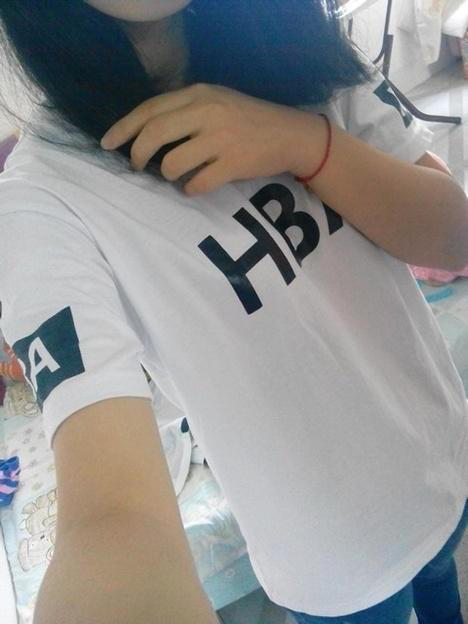

In [30]:
from PIL import Image
img = Image.open(train_img_path+img_name + '.jpg')
img

In [31]:
with open(train_anno_path+file_list[0]) as json_file:
    json_data = json.load(json_file)
    
item=[]
i=1
item.append('/train/image/' + file_list[0])
for k,v in json_data.items():
    if k == 'source':
        continue
    elif k == 'pair_id':
        continue
    boxes = json_data[k]["bounding_box"]
    category = json_data[k]["category_id"]
    item.append((boxes, category))
print(item)

['/train/image/000001.json', ([249, 423, 466, 623], 8), ([0, 29, 466, 622], 1)]


In [34]:
output_path = 'deepfashion2_dataset/train/'
f = open(output_path + 'all_data.json', 'w')
data = {}
for i, name in tqdm(enumerate(file_list)):
    with open(train_anno_path+name) as json_file:
        json_data = json.load(json_file)
    
    item={}
    item['path'] = '/train/image/' + name
    for k in json_data.keys():
        if k == 'source':
            continue
        elif k == 'pair_id':
            continue
        boxes = json_data[k]["bounding_box"]
        category = json_data[k]["category_id"]
        item[k] = (boxes, category)
    f.write(str(item)+'\n')
    data[i] = item
    
f.close()
print(data)

191961it [00:08, 21570.09it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
type(data)

dict

In [38]:
with open(output_path + 'all_data.json', 'r') as json_file:
    json_data = json.load(json_file)
    
json_file.close()

In [40]:
print(len(json_data))
print(json_data['0'])

191961
{'path': '/train/image/000001.jpg', 'item2': [[249, 423, 466, 623], 8], 'item1': [[0, 29, 466, 622], 1]}


In [41]:
new_data = {}
for key in json_data.keys():
    new_data[int(key)] = json_data[key]

In [42]:
print(len(new_data))
print(new_data[0])

191961
{'path': '/train/image/000001.jpg', 'item2': [[249, 423, 466, 623], 8], 'item1': [[0, 29, 466, 622], 1]}
